In [5]:
# load the required packages
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
%matplotlib inline

In [6]:
final_df = pd.read_csv('kouqiang_number.csv')

In [7]:
city_name_mapping = {
    '上海市': 'Shanghai',
    '北京市': 'Beijing',
    '南京市': 'Nanjing',
    '天津市': 'Tianjin',
    '广州市': 'Guangzhou',
    '成都市': 'Chengdu',
    '杭州市': 'Hangzhou',
    '武汉市': 'Wuhan',
    '深圳市': 'Shenzhen',
    '西安市': 'Xi\'an',
    '重庆市': 'Chongqing'
}

# Replace the Chinese city names with English names in the DataFrame
final_df['City'] = final_df['City'].map(city_name_mapping)


/tmp/ipykernel_8666/2776723730.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


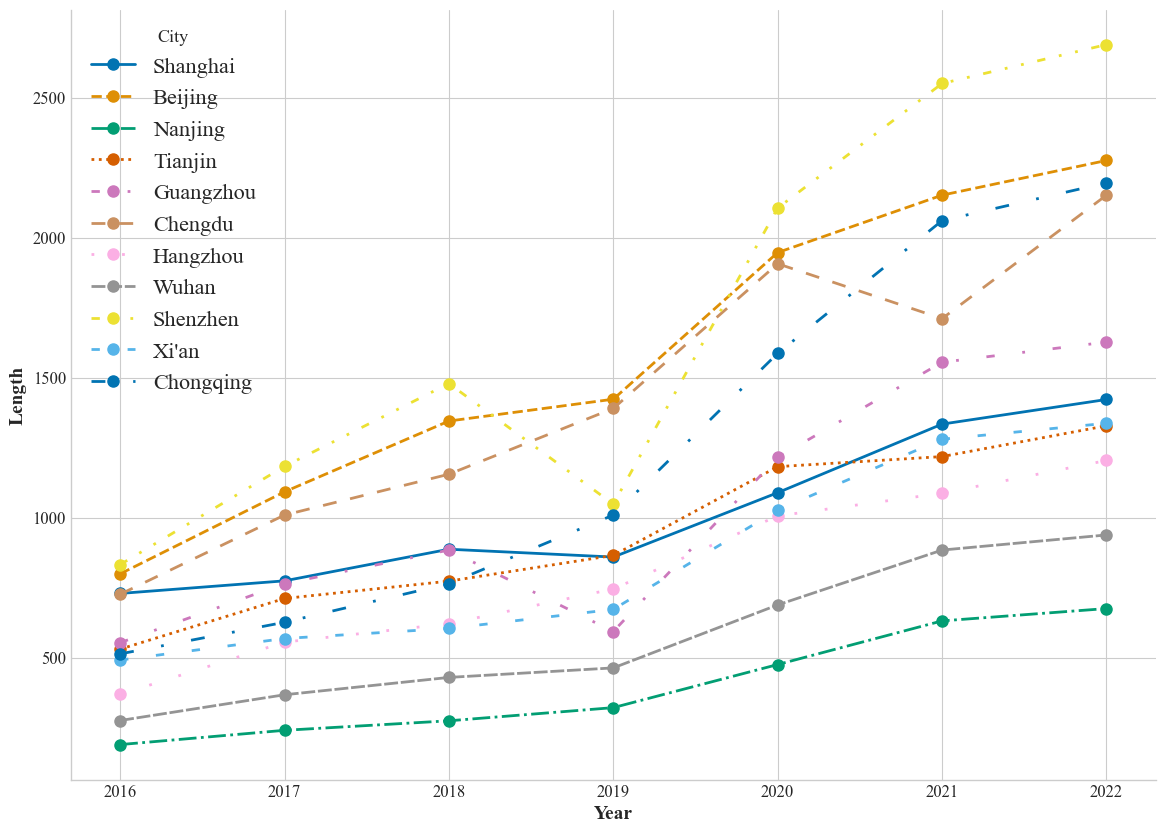

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming final_df is already defined and loaded
# Example structure of final_df:
# final_df = pd.DataFrame({
#     'Filename': ['kouqiang_20Beijing.csv', 'kouqiang_21Shanghai.csv'],
#     'Year': ['20', '21'],
#     'City': ['Beijing', 'Shanghai'],
#     'Length': [100, 150]
# })

# Convert Year to integer and ensure Length is integer
final_df['Year'] = final_df['Year'].astype(int) + 2000  # Adjust based on your year format; add 2000 if '20' means '2020'
final_df['Length'] = final_df['Length'].astype(int)

# Set the style of the matplotlib
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"

# Get unique cities
cities = final_df['City'].unique()

# Create a color palette
palette = sns.color_palette("colorblind", len(cities))
line_styles = ['-', '--', '-.', ':', (0, (3, 10, 1, 10)), (0, (5, 5)), (0, (1, 10)), (0, (5, 1)), (0, (3, 5, 1, 5, 1, 5)), (0, (3, 10, 3, 10)), (0, (5, 10, 1, 10))]

plt.figure(figsize=(14, 10), facecolor='none')

for i, city in enumerate(cities):
    city_df = final_df[final_df['City'] == city]
    plt.plot(city_df['Year'], city_df['Length'], marker='o', linestyle=line_styles[i % len(line_styles)], color=palette[i], label=city, linewidth=2, markersize=8)

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Length', fontsize=14, fontweight='bold')  # Adjust label as needed

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=16, title="City", title_fontsize='13', loc='upper left', frameon=False)
sns.despine()

# Adjust file name as needed
plt.savefig('private_dental_clinics_by_city_and_year.tiff', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig('data_by_city_and_year.tiff', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
